In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [158]:
import seaborn as sns

In [159]:
df = pd.read_excel("ExportDataAgriculture.xlsx")

In [160]:
df

,Date,Type,Export Value,OilWTI Price,Exchange Rate
0,2002-04-01,ข้าว,114.93,27.29,43.245
1,2002-05-01,ข้าว,107.97,25.31,42.340
2,2002-06-01,ข้าว,115.07,26.86,41.525
3,2002-07-01,ข้าว,122.73,27.02,42.025
4,2002-08-01,ข้าว,175.88,28.98,42.240
...,...,...,...,...,...
249,2023-01-01,ข้าว,412.94,80.11,32.840
250,2023-02-01,ข้าว,341.00,77.05,35.220
251,2023-03-01,ข้าว,371.36,75.67,34.160
252,2023-04-01,ข้าว,310.50,76.78,34.120


In [161]:
df.describe()

,Date,Export Value,OilWTI Price,Exchange Rate
count,254,254.000000,254.000000,254.000000
mean,2012-10-15 19:39:12.755905536,349.718110,66.813819,34.359185
min,2002-04-01 00:00:00,103.410000,18.840000,29.260000
25%,2007-07-08 18:00:00,247.125000,48.377500,31.502500
50%,2012-10-16 12:00:00,347.855000,65.125000,33.182500
75%,2018-01-24 06:00:00,435.820000,86.457500,35.835000
max,2023-05-01 00:00:00,805.010000,140.000000,43.495000
std,NaN,131.820523,24.255888,3.740348


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           254 non-null    datetime64[ns]
 1   Type           254 non-null    object        
 2   Export Value   254 non-null    float64       
 3   OilWTI Price   254 non-null    float64       
 4   Exchange Rate  254 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 10.0+ KB


/Users/parichat/opt/anaconda3/envs/ISExport/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


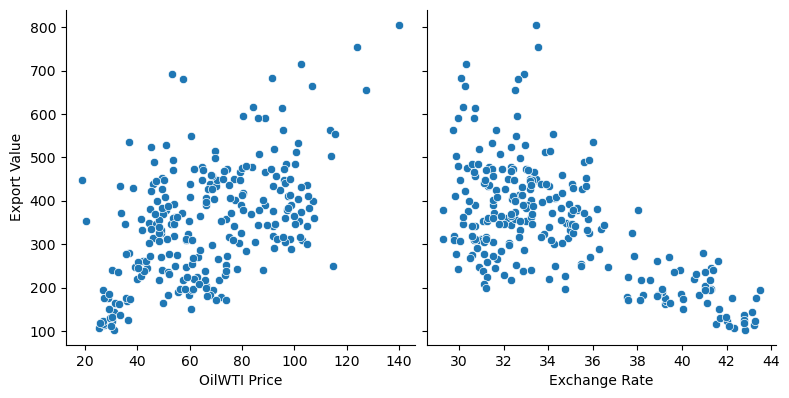

In [163]:
sns.pairplot(df, x_vars=['OilWTI Price', 'Exchange Rate'], y_vars='Export Value',height=4, aspect=1, kind='scatter')
plt.show()

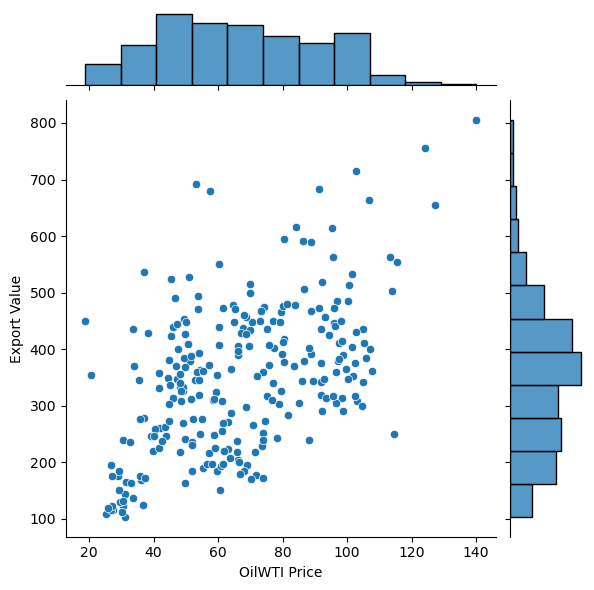

In [164]:
sns.jointplot(data=df, x="OilWTI Price", y="Export Value")

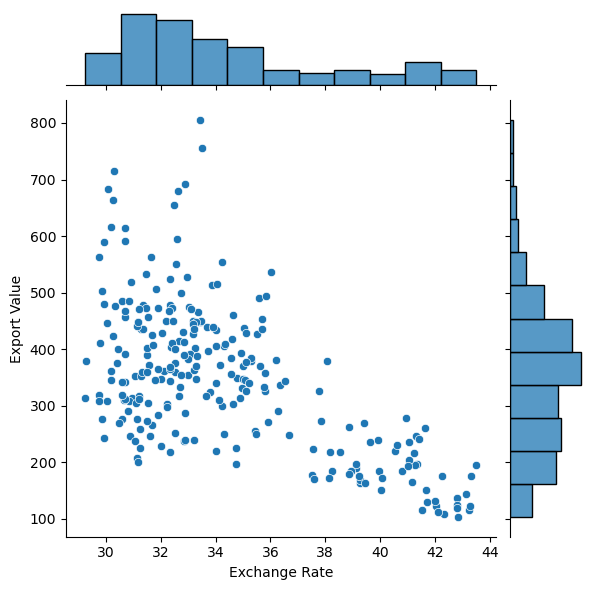

In [165]:
sns.jointplot(data=df, x="Exchange Rate", y="Export Value")

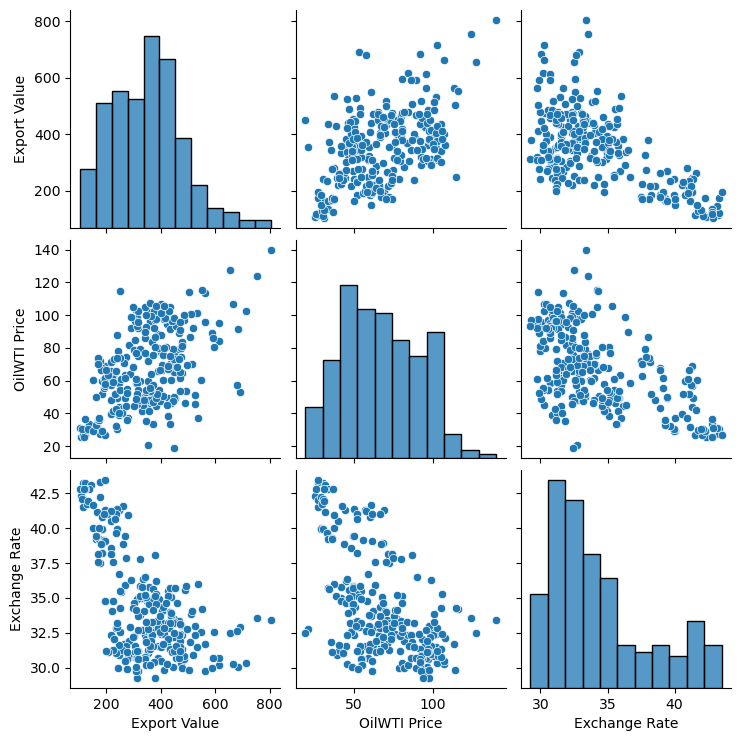

In [166]:
sns.pairplot(df)

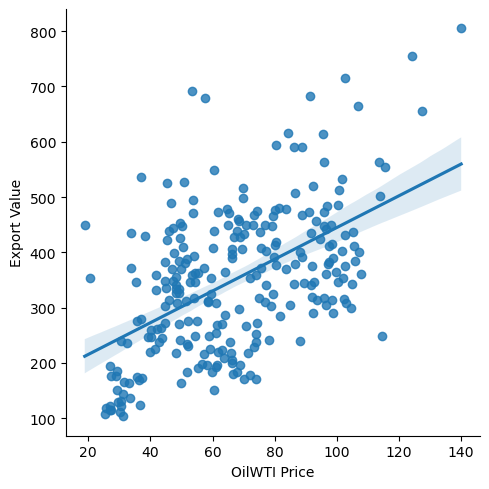

In [167]:
sns.lmplot(x='OilWTI Price',y ='Export Value', data=df)

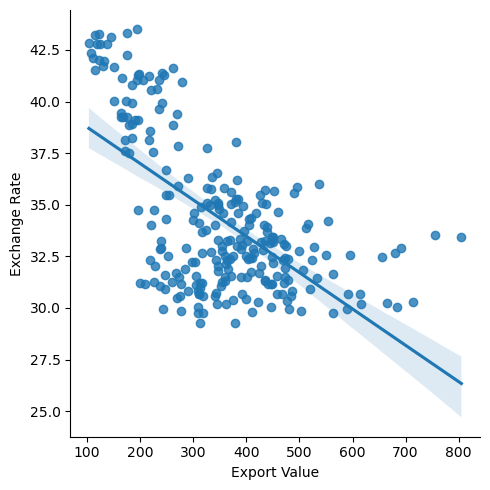

In [168]:
sns.lmplot(x='Export Value',y ='Exchange Rate', data=df)

In [169]:
X = df['OilWTI Price']
y = df['Export Value']

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [171]:
X_train.head()

118    107.07
149     91.16
74     140.00
214     44.76
83      49.66
Name: OilWTI Price, dtype: float64

In [172]:
y_train.head()

118    400.24
149    472.29
74     805.01
214    272.66
83     426.30
Name: Export Value, dtype: float64

In [173]:
import statsmodels.api as sm

In [174]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [175]:
lr.params

const           156.306843
OilWTI Price      2.951861
dtype: float64

In [176]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           Export Value   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     71.46
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.08e-14
Time:                        23:08:41   Log-Likelihood:                -1088.1
No. Observations:                 177   AIC:                             2180.
Df Residuals:                     175   BIC:                             2187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          156.3068     25.009      6.250   

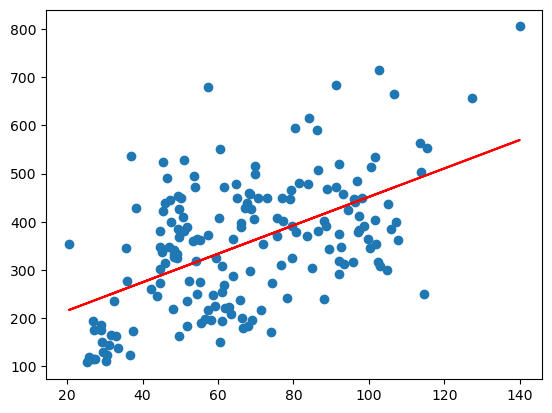

In [177]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 156.3068 + 2.9519*X_train, 'r')
plt.show()

In [178]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/var/folders/w0/n0j1qmgx69x3gvzr15x8kq3c0000gn/T/ipykernel_15150/281705575.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


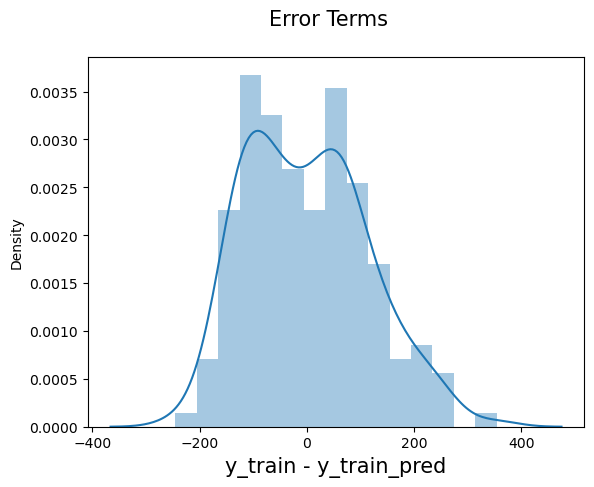

In [179]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()


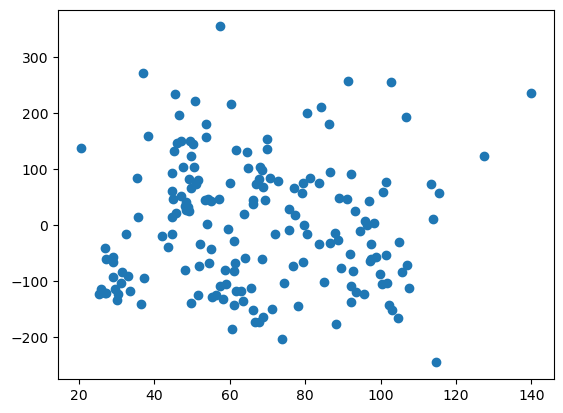

In [180]:
plt.scatter(X_train,res)
plt.show()

In [181]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [182]:
y_pred.head()

115    452.555564
69     427.140045
31     301.331750
75     522.573695
41     351.838083
dtype: float64

In [183]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [184]:
np.sqrt(mean_squared_error(y_test, y_pred))

108.7562874123751

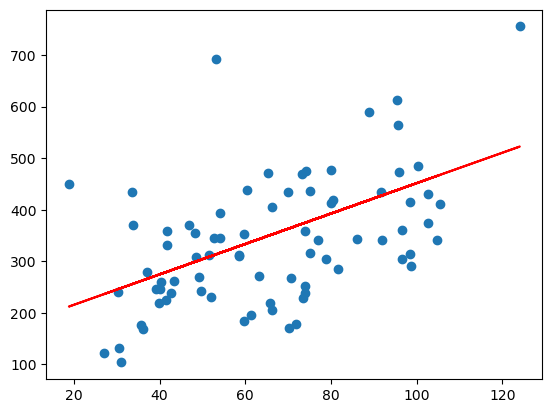

In [185]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 156.3068 + 2.9519 * X_test, 'r')
plt.show()

In [205]:
X = df['Exchange Rate']
y = df['Export Value']

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [207]:
X_train.head()

118    30.440
149    32.420
74     33.430
214    31.510
83     35.495
Name: Exchange Rate, dtype: float64

In [208]:
y_train.head()

118    400.24
149    472.29
74     805.01
214    272.66
83     426.30
Name: Export Value, dtype: float64

In [209]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [210]:
lr.params

const            1141.640846
Exchange Rate     -22.880583
dtype: float64

In [211]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           Export Value   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     127.6
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.41e-22
Time:                        23:27:10   Log-Likelihood:                -1069.9
No. Observations:                 177   AIC:                             2144.
Df Residuals:                     175   BIC:                             2150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1141.6408     70.060     16.295

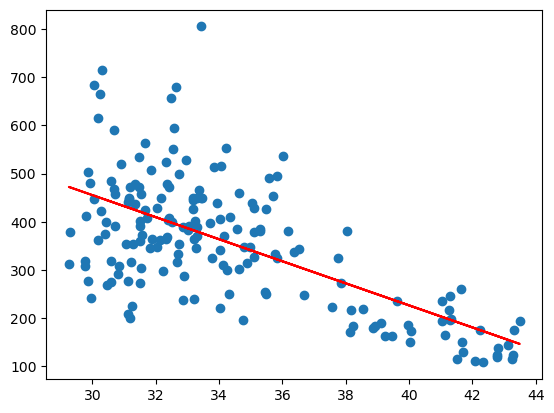

In [212]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1141.6408 + -22.8806 *X_train, 'r')
plt.show()

In [213]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/var/folders/w0/n0j1qmgx69x3gvzr15x8kq3c0000gn/T/ipykernel_15150/281705575.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


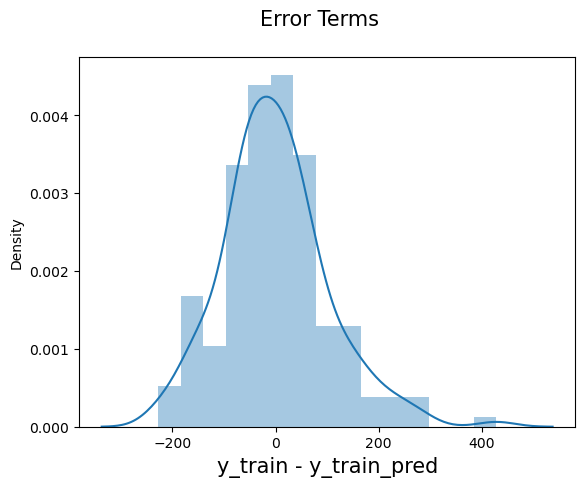

In [214]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()


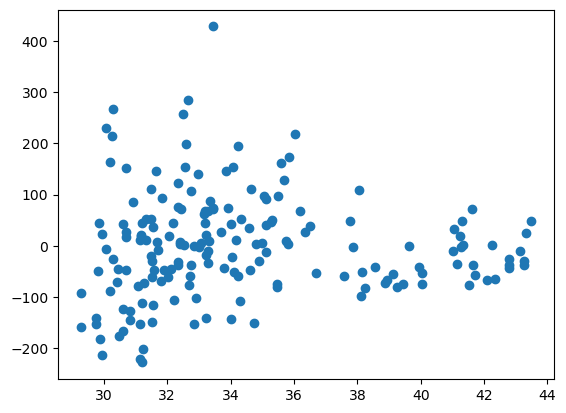

In [215]:
plt.scatter(X_train,res)
plt.show()